In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def make_data(N=100, err=0.8, rseed=1):

    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

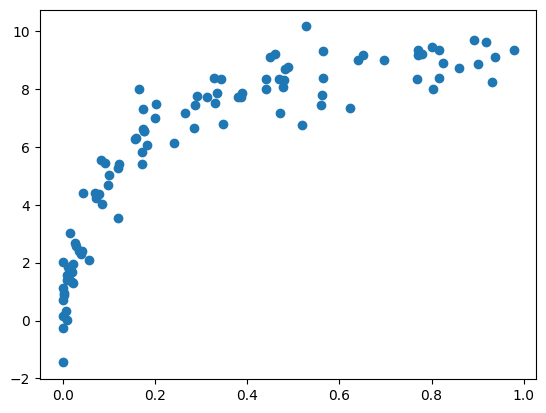

In [17]:
X, y = make_data()
plt.scatter(X.ravel(), y);

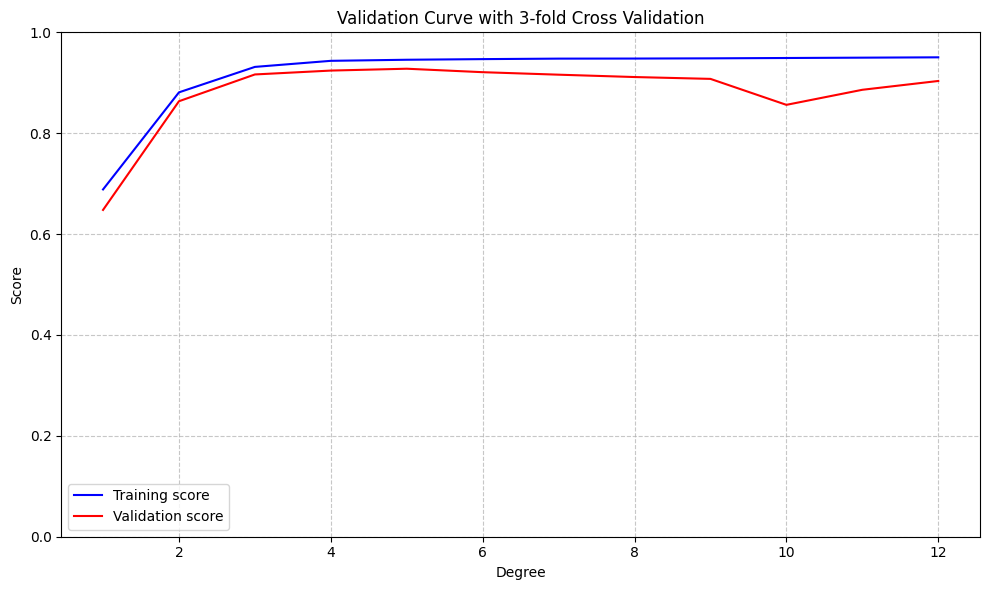

In [20]:
from sklearn.model_selection import validation_curve

# Set up polynomial degrees
degrees = range(1, 13)  # 1 to 12

# Calculate validation curve using R² score
train_scores, val_scores = validation_curve(
    PolynomialRegression(), X, y, 
    param_name = "polynomialfeatures__degree", 
    param_range = degrees,
    cv = 3,  # 3-fold cross-validation
    scoring = "r2"  # Use R² score
)

# Calculate mean scores (no need to negate as R² is already a "higher is better" metric)
train_scores_mean = np.mean(train_scores, axis = 1)
val_scores_mean = np.mean(val_scores, axis = 1)

# Plot the validation curve
plt.figure(figsize =(10, 6))
plt.title("Validation Curve with 3-fold Cross Validation")
plt.xlabel("Degree")
plt.ylabel("Score")
plt.ylim(0, 1)  # R² score ranges from 0 to 1

plt.plot(degrees, train_scores_mean, label = "Training score", color = "blue")
plt.plot(degrees, val_scores_mean, label = "Validation score", color = "red")

plt.legend(loc = "best")
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

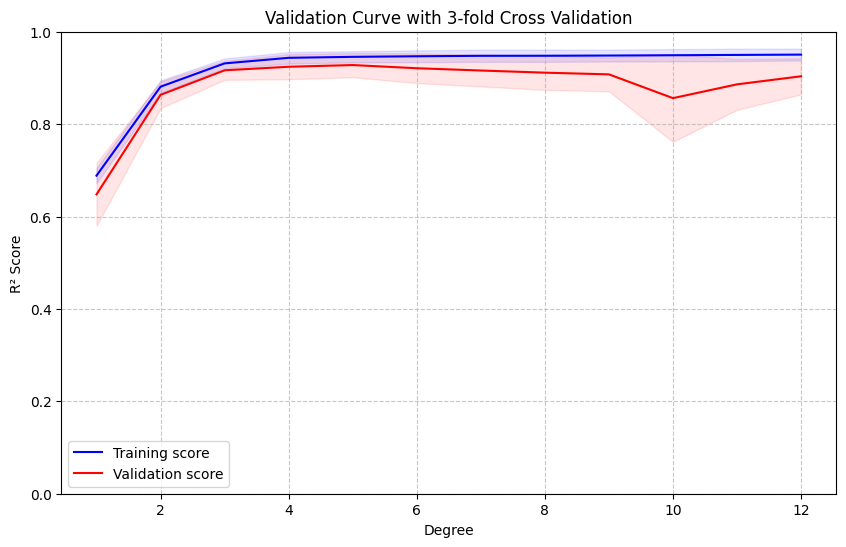

In [25]:
## TODO 
## plot the mean score of training and validation curves using a polynomial regression model with 3-fold cross validation

# 設置多項式度數範圍
degrees = range(1, 13)

# 計算驗證曲線
train_scores, val_scores = validation_curve(
    PolynomialRegression(), X, y, 
    param_name="polynomialfeatures__degree", 
    param_range=degrees,
    cv=3, scoring="r2"  # 改為使用 R² score
)

# 計算平均分數和標準差
train_scores_mean = np.mean(train_scores, axis=1)  # 不需要取負值
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)  # 不需要取負值
val_scores_std = np.std(val_scores, axis=1)

# 繪製驗證曲線
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with 3-fold Cross Validation")
plt.xlabel("Degree")
plt.ylabel("R² Score")
plt.ylim(0, 1)  # R² score 範圍是 0 到 1

plt.plot(degrees, train_scores_mean, label="Training score", color="blue")
plt.plot(degrees, val_scores_mean, label="Validation score", color="red")

plt.fill_between(degrees, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(degrees, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="red")

plt.legend(loc="best")
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()